
<div align="center">
<p style="font-size: 6em;">AI61201: Visual Computing with AI/ML </p>
Programming Assignment 1: Working With Images Using OpenCV (20 Marks)
</div>

---

Due Date: August 13 (by 9 PM IST)


## Task 1: Conversion of color

Conversion Matrices

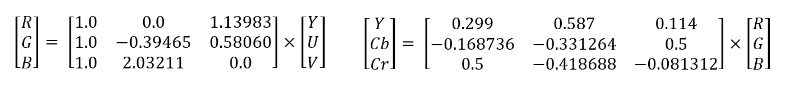

In these color spaces, Y stands for the luma channel and U,
V or Cb. Cr stand for the chroma channels.

The conversion of RGB to YCbCr can be performed as:
- Y = 0.299 ⋅ R + 0.587 ⋅ G + 0.114 ⋅ B
- Cr = 0.713(R - Y) + 128
- Cb = 0.564(B - Y) + 128

Imported YUV Image is :


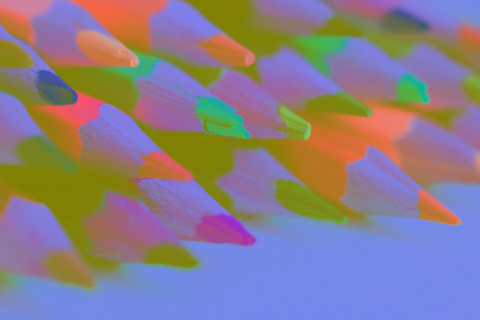

In [12]:
import requests
from io import BytesIO
from PIL import Image

# storing url to fetch the image
a_1_task_1_url = 'https://raw.githubusercontent.com/malivinayak/KGP/main/Sem_1/AI61201/assignment_1_inputs/a_1_task_1.png'
# requesting the image
response = requests.get(a_1_task_1_url)
# checking status
response.raise_for_status()
# storing image in variable
yuv_image = Image.open(BytesIO(response.content))
# Displaying image
print("Imported YUV Image is :")
yuv_image

In [13]:
# Library Import
import numpy as np

In [14]:
# converting image to array
yuv_array = np.array(yuv_image)
print("COnverting image to array:\n",yuv_array)

COnverting image to array:
 [[[212 127 152]
  [210 128 154]
  [210 128 155]
  ...
  [116 137 230]
  [117 137 230]
  [117 137 230]]

 [[213 126 150]
  [212 128 151]
  [211 128 152]
  ...
  [117 137 230]
  [117 137 230]
  [117 137 231]]

 [[215 127 145]
  [215 128 148]
  [214 129 148]
  ...
  [117 137 231]
  [117 137 230]
  [117 137 231]]

 ...

 [[117 138 225]
  [117 138 225]
  [117 138 225]
  ...
  [119 136 236]
  [119 136 236]
  [119 136 236]]

 [[117 138 226]
  [117 138 226]
  [117 138 225]
  ...
  [120 136 236]
  [120 135 237]
  [120 136 236]]

 [[117 138 226]
  [117 138 227]
  [117 138 226]
  ...
  [121 136 236]
  [121 136 236]
  [121 136 236]]]


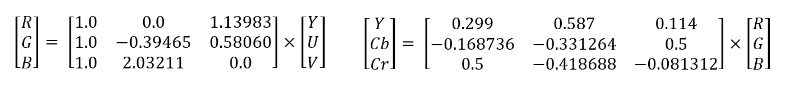

In [57]:
# yuv_to_rgb_matrix
yuv_to_rgb_matrix_dict = {
    "R": [1.0, 0.0, 1.13983],
    "G": [1.0, -0.39465, 0.58060],
    "B": [1.0, 2.03211, 0.0]
}
yuv_to_rgb_matrix = np.array(list(yuv_to_rgb_matrix_dict.values()))

# rgb_to_ycbcr_matrix
rgb_to_ycbcr_matrix_dict = {
    "Y": [0.299, 0.587, 0.114],
    "Cb": [-0.168736, -0.331264, 0.5],
    "Cr": [0.5, -0.418688, -0.081312]
}

rgb_to_ycbcr_matrix = np.array(list(rgb_to_ycbcr_matrix_dict.values()))


print("Image conversion required functions")
def yuv_to_rgb(yuv):
    print("Converting YUV to RGB")
    result = np.dot(yuv, yuv_to_rgb_matrix.T)
    return result

def rgb_to_ycbcr(rgb):
    print("Converting RGB to YcBcR")
    result = np.dot(rgb, rgb_to_ycbcr_matrix.T)
    return result


Image conversion required functions


In [58]:
rgb_array = yuv_to_rgb(yuv_array)
print("RGB Array")

ycbcr_array = rgb_to_ycbcr(rgb_array)
print("YCBCR Array")

Converting YUV to RGB
RGB Array
Converting RGB to YcBcR
YCBCR Array


Converted Image using numpy:



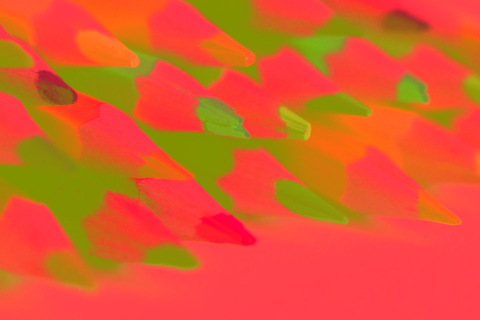

In [59]:
ycbcr_image = Image.fromarray(np.uint8(ycbcr_array.clip(0, 255)))
print("Converted Image using numpy:\n")
ycbcr_image

Conversion using openCV

In [18]:
import cv2

image_np = np.array(yuv_image)
print("Converting YUV Image to RGB")
rgb_image_using_cv = cv2.cvtColor(image_np, cv2.COLOR_YUV2RGB)
print("Converting RGB Image to YCBCR")
ycbcr_image_using_cv = cv2.cvtColor(rgb_image_using_cv, cv2.COLOR_RGB2YCrCb)

Converting YUV Image to RGB
Converting RGB Image to YCBCR


RGB image using cv library


array([[[239, 198, 210],
        [240, 195, 210],
        [241, 194, 210],
        ...,
        [232,  53, 134],
        [233,  54, 135],
        [233,  54, 135]],

       [[238, 201, 209],
        [238, 199, 212],
        [238, 197, 211],
        ...,
        [233,  54, 135],
        [233,  54, 135],
        [234,  54, 135]],

       [[234, 206, 213],
        [238, 203, 215],
        [237, 202, 216],
        ...,
        [234,  54, 135],
        [233,  54, 135],
        [234,  54, 135]],

       ...,

       [[228,  57, 137],
        [228,  57, 137],
        [228,  57, 137],
        ...,
        [242,  53, 135],
        [242,  53, 135],
        [242,  53, 135]],

       [[229,  56, 137],
        [229,  56, 137],
        [228,  57, 137],
        ...,
        [243,  54, 136],
        [244,  54, 134],
        [243,  54, 136]],

       [[229,  56, 137],
        [230,  56, 137],
        [229,  56, 137],
        ...,
        [244,  55, 137],
        [244,  55, 137],
        [244,  55, 137]]], dtype=uint8)
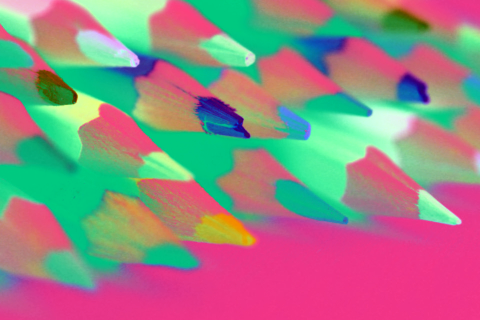

In [19]:
print("RGB image using cv library")
rgb_image_using_cv

YCBCR image using cv library


array([[[212, 147, 127],
        [210, 149, 128],
        [210, 150, 128],
        ...,
        [116, 211, 138],
        [117, 211, 138],
        [117, 211, 138]],

       [[213, 146, 126],
        [212, 147, 128],
        [211, 147, 128],
        ...,
        [117, 211, 138],
        [117, 211, 138],
        [117, 211, 138]],

       [[215, 142, 127],
        [215, 144, 128],
        [214, 144, 129],
        ...,
        [117, 211, 138],
        [117, 211, 138],
        [117, 211, 138]],

       ...,

       [[117, 207, 139],
        [117, 207, 139],
        [117, 207, 139],
        ...,
        [119, 216, 137],
        [119, 216, 137],
        [119, 216, 137]],

       [[117, 208, 139],
        [117, 208, 139],
        [117, 207, 139],
        ...,
        [120, 216, 137],
        [120, 216, 136],
        [120, 216, 137]],

       [[117, 208, 139],
        [117, 209, 139],
        [117, 208, 139],
        ...,
        [121, 216, 137],
        [121, 216, 137],
        [121, 216, 137]]], dtype=uint8)
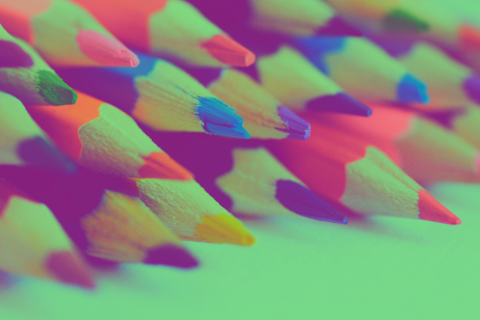

In [20]:
print("YCBCR image using cv library")
ycbcr_image_using_cv

Conclusion: Converted image using CV2 is better.

## Function for all tasks

In [21]:
# Function which can fetch image from my github acc and convert it into array
def fetch_image_to_array(url,display=False):
    response = requests.get(url)
    response.raise_for_status()
    image = Image.open(BytesIO(response.content)).convert("RGB")
    if display:
        display_image(image)
    return np.array(image)

In [22]:
import matplotlib.pyplot as plt
def display_image(image):
    plt.figure(figsize=(image.width / 100, image.height / 100), dpi=100)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

## Task 2: XOR Operation

Fetching First Image



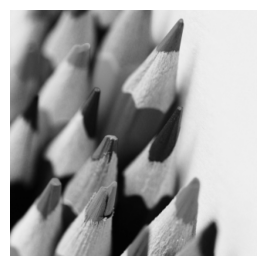


First Image Fetched



In [23]:
print("Fetching First Image\n")
a_1_task_2a_url = 'https://raw.githubusercontent.com/malivinayak/KGP/main/Sem_1/AI61201/assignment_1_inputs/a_1_task_2_a.png'
task_2a_array = fetch_image_to_array(a_1_task_2a_url,True)
print("\nFirst Image Fetched\n")

Fetching Second Image



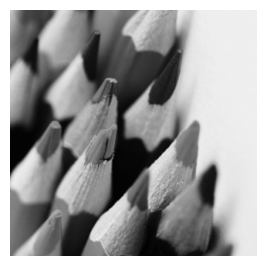


Second Image Fetched



In [24]:
print("Fetching Second Image\n")
a_1_task_2b_url = 'https://raw.githubusercontent.com/malivinayak/KGP/main/Sem_1/AI61201/assignment_1_inputs/a_1_task_2_b.png'
task_2b_array = fetch_image_to_array(a_1_task_2b_url,True)
print("\nSecond Image Fetched\n")

In [25]:
def AI_custom_xor(AI13_image_arr1, AI13_image_arr2):
    if AI13_image_arr1.shape != AI13_image_arr2.shape:
        print("Raising error as shape is not matching")
        raise ValueError("Arrays do not have the same shape")
    result = np.zeros_like(AI13_image_arr1, dtype=np.uint8)
    for R in range(AI13_image_arr1.shape[0]):
        for G in range(AI13_image_arr1.shape[1]):
            for B in range(AI13_image_arr1.shape[2]):
                result[R, G, B] = AI13_image_arr1[R, G, B] ^ AI13_image_arr2[R, G, B]
    return result

Verifying the shape of images
BITWISE XOR operation started
BITWISE XOR operation COMPLETED
---------------------
Following is the XOR image
---------------------


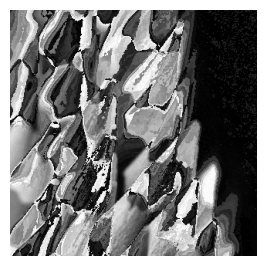

In [26]:
print("Verifying the shape of images")
if task_2a_array.shape != task_2b_array.shape:
    print("SHape doesn't match raising error")
    raise ValueError("Images do not have the same shape")

print("BITWISE XOR operation started")
xor_result = AI_custom_xor(task_2a_array, task_2b_array)
print("BITWISE XOR operation COMPLETED")

xor_image = Image.fromarray(xor_result)
print("---------------------\nFollowing is the XOR image\n---------------------")
display_image(xor_image)

BITWISE XOR operation using opencv started
BITWISE XOR operation using opencv COMPLETED
---------------------
Following is the XOR image via CV2
---------------------


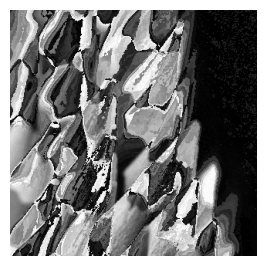

In [27]:
task_2a_cv = cv2.cvtColor(task_2a_array, cv2.COLOR_RGB2BGR)
task_2b_cv = cv2.cvtColor(task_2b_array, cv2.COLOR_RGB2BGR)

print("BITWISE XOR operation using opencv started")
xor_result_cv2 = cv2.bitwise_xor(task_2a_cv, task_2b_cv)
print("BITWISE XOR operation using opencv COMPLETED")

xor_image_cv2 = Image.fromarray(xor_result_cv2)
print("---------------------\nFollowing is the XOR image via CV2\n---------------------")
display_image(xor_image_cv2)

✅ As per visual operation custom XOR and cv2 XOR results are simillar

## Task 3: Rotating image

Loading Image for Task 3


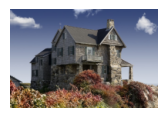

In [28]:
print("Loading Image for Task 3")
a_1_task_3_url = 'https://raw.githubusercontent.com/malivinayak/KGP/main/Sem_1/AI61201/assignment_1_inputs/a_1_task_3.png'
task_3_array = fetch_image_to_array(a_1_task_3_url,True)

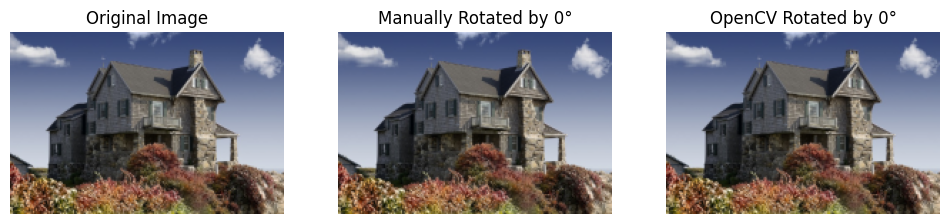

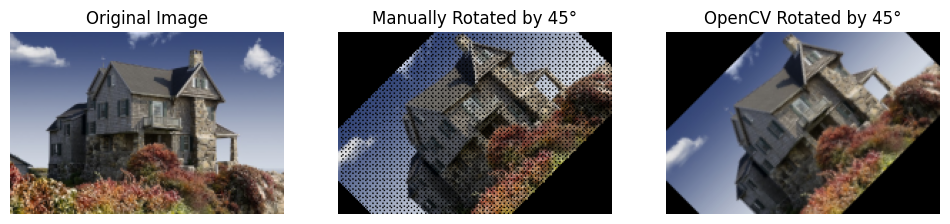

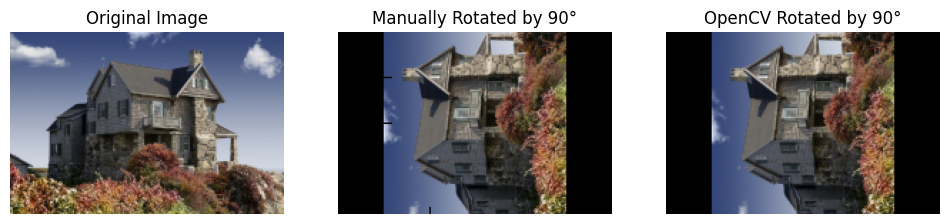

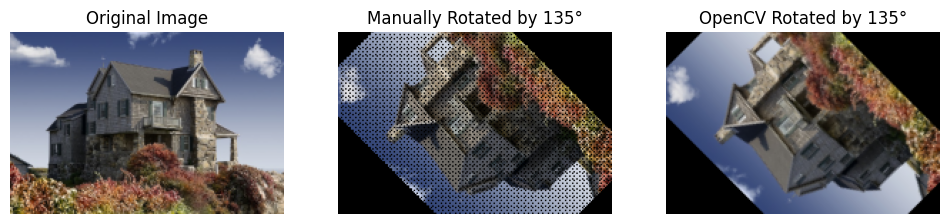

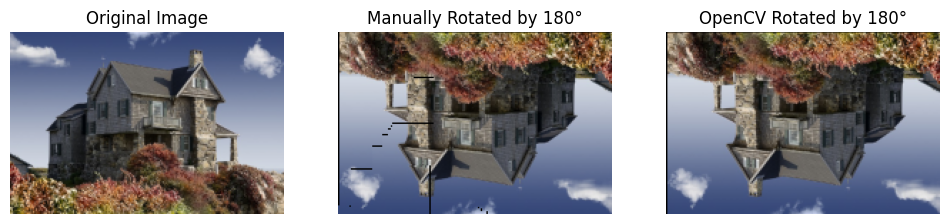

In [29]:
def manual_rotate_image(image_array, angle):
    angle_rad = np.deg2rad(angle)
    cos_value = np.cos(angle_rad)
    sin_value = np.sin(angle_rad)
    h, w, c = image_array.shape
    rotated_image = np.zeros_like(image_array)
    for i in range(h):
        for j in range(w):
            x = int((j - (w // 2)) * cos_value - (i - (h // 2)) * sin_value + (w // 2))
            y = int((j - (w // 2)) * sin_value + (i - (h // 2)) * cos_value + (h // 2))
            if 0 <= x < w and 0 <= y < h:
                rotated_image[y, x] = image_array[i, j]
    return rotated_image

def verify_rotation_opencv(image_array, angle):
    print("Calculating center")
    center = (image_array.shape[1] // 2, image_array.shape[0] // 2)
    print("Calculating rotation matrix")
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    print("Rotating image")
    rotated_image = cv2.warpAffine(image_array, M, (image_array.shape[1], image_array.shape[0]))
    print("Rotation completed")
    return rotated_image

# Define the rotation angles
angles = [0, 45, 90, 135, 180]

for angle in angles:
    manually_rotated_image = manual_rotate_image(task_3_array,-angle)
    opencv_rotated_image = verify_rotation_opencv(task_3_array, angle)

    # Plot the results
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(task_3_array)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(manually_rotated_image)
    plt.title(f'Manually Rotated by {angle}°')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(opencv_rotated_image)
    plt.title(f'OpenCV Rotated by {angle}°')
    plt.axis('off')

    plt.show()

⏺CONCLUSION➡  Manual rotation leads to some pixel corruption.

## Task 4: hiding one plane in another image

**Steps to hide image i need to perform**
- convert image to binary
- separate bit planes
- perform task
- convert binary back to image

Fetching First Image for task 4



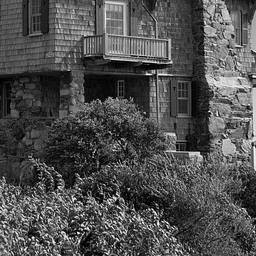

In [30]:
# 0. Loading images
print("Fetching First Image for task 4\n")
a_1_task_4a_url = 'https://raw.githubusercontent.com/malivinayak/KGP/main/Sem_1/AI61201/assignment_1_inputs/a_1_task_4_a.png'
response = requests.get(a_1_task_4a_url)
response.raise_for_status()
task_4a = Image.open(BytesIO(response.content))
task_4a

Fetching Second Image for task 4



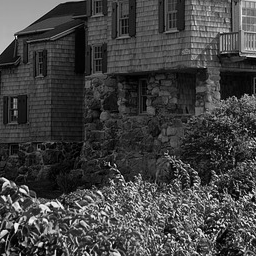

In [31]:
print("Fetching Second Image for task 4\n")
a_1_task_4b_url = 'https://raw.githubusercontent.com/malivinayak/KGP/main/Sem_1/AI61201/assignment_1_inputs/a_1_task_4_b.png'
response = requests.get(a_1_task_4b_url)
response.raise_for_status()
task_4b = Image.open(BytesIO(response.content))
task_4b

Both images are looking black&white so we will convert into grayscale for ease

In [32]:
# 1. Convert image to binary
from PIL import Image
task_4a_array = np.array(task_4a)
task_4b_array = np.array(task_4b)

array([[ 56,  71,  77, ...,  21,  25,  30],
       [ 74,  81,  88, ...,  18,  31,  42],
       [ 71,  84,  81, ...,  10,  27,  43],
       ...,
       [158, 165, 127, ..., 145, 127,  99],
       [156, 122,  83, ...,  87,  93,  64],
       [134,  68,  68, ..., 138,  62,  23]], dtype=uint8)
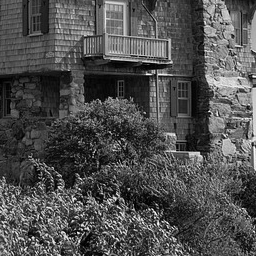

In [33]:
task_4a_array

- We need to convert this image value to 8-bit
- Each value lies between 0 to 256 -> 8bit
-We have total of 256x256 matrix and we need to convert all into cell in 8bit value

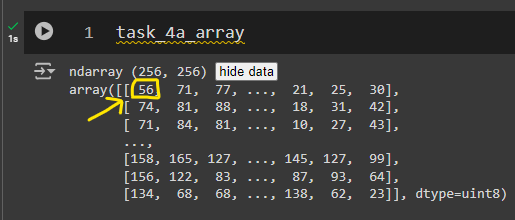


In [34]:
#trying to access cell value
task_4a_array[0][0]

56

In [35]:
# Testing to convert number to binary
f'{task_4a_array[0][0]:08b}'

'00111000'

In [36]:
print(task_4a_array)

[[ 56  71  77 ...  21  25  30]
 [ 74  81  88 ...  18  31  42]
 [ 71  84  81 ...  10  27  43]
 ...
 [158 165 127 ... 145 127  99]
 [156 122  83 ...  87  93  64]
 [134  68  68 ... 138  62  23]]


In [37]:
# Initializing empty string arrays
task_4a_array_bit = [['' for _ in range(256)] for _ in range(256)]
task_4b_array_bit = [['' for _ in range(256)] for _ in range(256)]

# print(task_4a_array_bit)
for i in range(256):
    for j in range(256):
        # print(f'{task_4a_array[i][j]:08b}')
        task_4a_array_bit[i][j] = f'{task_4a_array[i][j]:08b}'
        task_4b_array_bit[i][j] = f'{task_4b_array[i][j]:08b}'

print(task_4a_array_bit[0][:10])
print(task_4b_array_bit[0][:10])

['00111000', '01000111', '01001101', '01011011', '01011000', '01001000', '01010111', '01011100', '01011001', '01010011']
['10011011', '10011011', '10011011', '10011100', '10011100', '10011100', '10011100', '10011100', '10011100', '10011100']


Succesfully bit planes are seprated

Next sub-task is to operate on bit planes

For this I am choicing LSB bit of image A
- the MSB bit plane of image B i.e. over-writing of LSB bit of image to A with MSB bit of image B.

Because the after hiding bit plane we need to convert back to binary array and LSB bit afftects most least while thi conversion


In [38]:
# testing to print LSB bit of image A
task_4a_array_bit[0][0][7]

'0'

In [39]:
# hiding msb bit from image B to LSB bit in image A
msb, lsb = 0, 7
for i in range(256):
    for j in range(256):
        # task_4a_array_bit[i][j][7] = task_4b_array_bit[i][j][0]
        # Can not modify directly so need to convert to list and then modify the bit
        list_a_bits = list(task_4a_array_bit[i][j])
        list_a_bits[lsb] = task_4b_array_bit[i][j][msb]
        task_4a_array_bit[i][j] = ''.join(list_a_bits)

In [40]:
# CHecking via printing first 10 element
print(task_4a_array_bit[0][:10])

['00111001', '01000111', '01001101', '01011011', '01011001', '01001001', '01010111', '01011101', '01011001', '01010011']


Converting back to image

In [41]:
task_4a_array_modified = [[0 for _ in range(256)] for _ in range(256)]
for i in range(256):
    for j in range(256):
        task_4a_array_modified[i][j] = int(task_4a_array_bit[i][j], 2)

In [42]:
print(task_4a_array_modified)

[[57, 71, 77, 91, 89, 73, 87, 93, 89, 83, 81, 101, 91, 93, 89, 101, 79, 93, 105, 85, 93, 103, 57, 39, 49, 51, 49, 13, 43, 87, 69, 69, 47, 39, 51, 65, 41, 49, 69, 49, 51, 39, 31, 35, 35, 31, 35, 31, 13, 83, 105, 95, 85, 95, 75, 91, 57, 87, 107, 61, 91, 91, 85, 97, 85, 61, 85, 69, 57, 91, 95, 75, 81, 79, 65, 37, 65, 93, 77, 71, 81, 85, 87, 106, 110, 88, 96, 96, 80, 82, 86, 82, 90, 72, 56, 8, 92, 76, 54, 70, 70, 60, 68, 110, 130, 130, 124, 122, 126, 120, 116, 108, 104, 104, 102, 98, 100, 102, 106, 110, 106, 102, 106, 98, 90, 98, 102, 90, 68, 80, 54, 70, 104, 92, 54, 50, 56, 64, 82, 58, 56, 46, 86, 32, 34, 40, 30, 32, 16, 20, 24, 20, 26, 24, 48, 32, 30, 106, 98, 70, 64, 60, 66, 56, 60, 34, 52, 94, 88, 56, 76, 70, 64, 72, 66, 76, 62, 60, 70, 64, 58, 50, 50, 60, 48, 44, 34, 42, 40, 44, 30, 26, 28, 32, 22, 36, 46, 30, 42, 84, 60, 24, 104, 156, 198, 194, 172, 194, 150, 70, 102, 180, 164, 176, 162, 128, 216, 176, 150, 128, 174, 86, 28, 48, 96, 60, 46, 48, 54, 53, 61, 60, 26, 28, 40, 54, 40, 36,

In [43]:
modified_image_array = np.array(task_4a_array_modified, dtype=np.uint8)
output_image = Image.fromarray(modified_image_array)

Original Image:


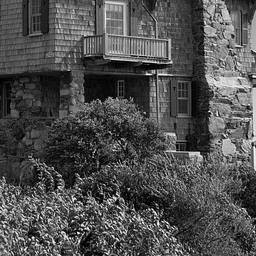

In [44]:
print("Original Image:")
task_4a

modifed Image:


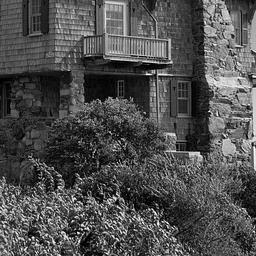

In [45]:
print("modifed Image:")
output_image

As we can see image don't have much difference because we have used the LSB bit to modify which doesn't affect much on 8bit biary value

In [46]:
# Saving the final result
output_image.save('24AI60R13_Task4_output.png')

## Task 5: 4x upscale using bicubic interpolation

Some IMP points
 - 1D: Bicubic uses 4 pixels to extrapolate pixel value (Applying on horizontal and Vertical pixels)

 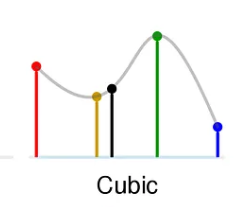

 - 2D: Bicubic uses 4 * 4 = 16 pixels to extrapolate pixel value (Applying on intermediate pixels)

 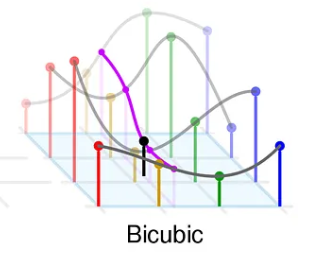

 Reference: [Medium Blog @amanrao032](https://medium.com/@amanrao032/image-upscaling-using-bicubic-interpolation-ddb37295df0)

In [47]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np
# 0. Loading images
a_1_task_5_url = 'https://raw.githubusercontent.com/malivinayak/KGP/main/Sem_1/AI61201/assignment_1_inputs/a_1_task_5.png'
response = requests.get(a_1_task_5_url)
response.raise_for_status()  # Check if the request was successful
task_5 = Image.open(BytesIO(response.content))

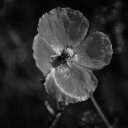

In [48]:
task_5

array([[11, 12, 14, ...,  3,  3,  3],
       [12, 12, 12, ...,  4,  4,  3],
       [13, 12, 12, ...,  5,  5,  4],
       ...,
       [ 7,  7,  7, ...,  7,  7,  7],
       [ 7,  7,  7, ..., 11,  9,  9],
       [ 8,  8,  7, ..., 13, 13, 12]], dtype=uint8)
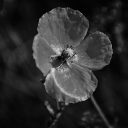

In [49]:
task_5_array = np.array(task_5)
task_5_array

In [50]:
# extracting height and width of original image and storing it into the variables
h, w = np.size(task_5_array,0), np.size(task_5_array,1)
print(h,w)

128 128


In [51]:
import numpy as np

def image_interpolation_4x(task_5_fun_image):
    print("Function start")
    h, w = np.size(task_5_fun_image, 0), np.size(task_5_fun_image, 1)
    print("Height and weight are",h, w)

    task_5_4x = [[0 for _ in range(w * 4)] for _ in range(h * 4)]
    print(np.array(task_5_4x).shape)

    for i in range(0, np.size(task_5_4x, 0), 4):
        for j in range(0, np.size(task_5_4x, 1), 4):
            task_5_4x[i][j] = np.mean(task_5_fun_image[int(i / 4)][int(j / 4)])

    print("1st for loop completed")

    def cubic_weight(t):
        t = abs(t)
        if t <= 1:
            return 1.5 * t**3 - 2.5 * t**2 + 1
        elif t < 2:
            return -0.5 * t**3 + 2.5 * t**2 - 4 * t + 2
        else:
            return 0

    for i in range(np.size(task_5_4x, 0)):
        for j in range(np.size(task_5_4x, 1)):
            if i % 4 != 0 or j % 4 != 0:
                sum_weights = 0
                sum_pixels = 0
                for m in range(-2, 2):
                    for n in range(-2, 2):
                        x = min(max(i // 4 + m, 0), h - 1)
                        y = min(max(j // 4 + n, 0), w - 1)
                        weight = cubic_weight(m - (i % 4) / 4.0) * cubic_weight(n - (j % 4) / 4.0)
                        sum_weights += weight
                        sum_pixels += weight * task_5_fun_image[x][y]

                task_5_4x[i][j] = round(sum_pixels / sum_weights)

    print("All for loop completed")
    return task_5_4x


Function start
Height and weight are 128 128
(512, 512)
1st for loop completed
All for loop completed


<ipython-input-52-666d8c4cbc78>:2: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  task_5_4x_array = np.array(task_5_4x, dtype=np.uint8)


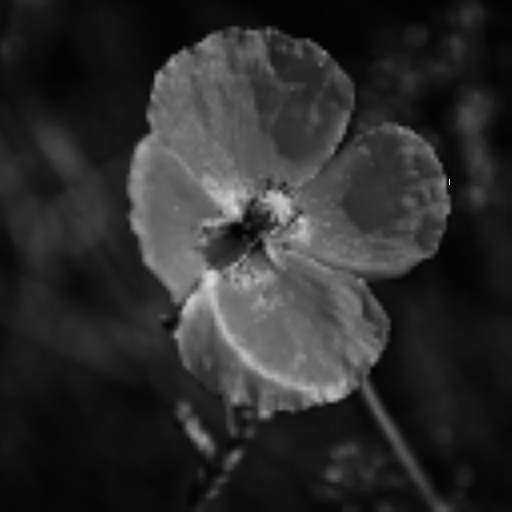

In [52]:
task_5_4x = image_interpolation_4x(task_5_array)
task_5_4x_array = np.array(task_5_4x, dtype=np.uint8)
task_5_4x_img = Image.fromarray(task_5_4x_array)
task_5_4x_img

In [53]:
import cv2
import numpy as np

def upscale_image_4x(task_5_fun_image):
    # Use OpenCV's resize function to scale the image by 4x using bicubic interpolation
    task_5_4x = cv2.resize(task_5_fun_image, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
    return task_5_4x

upscaled_image = upscale_image_4x(task_5_array)

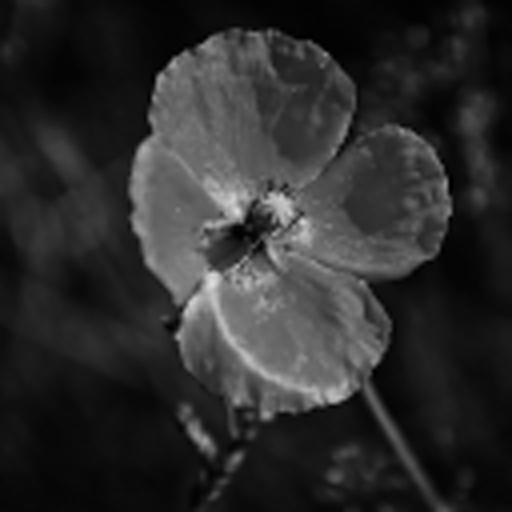

In [54]:
task_5_4x_cv2 = Image.fromarray(upscaled_image)
task_5_4x_cv2

✅ As we can see logic from scatch and cv2 results are looking simillar